In [54]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [55]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

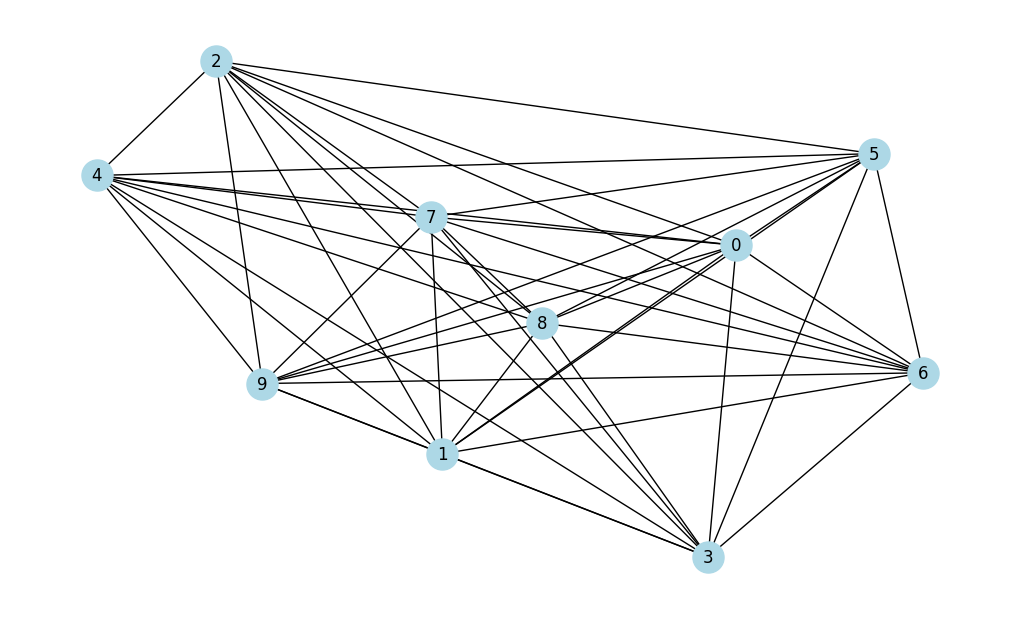

In [56]:
G = gnp_random_connected_graph(10, 1, False, True)

# For Task 1

## Kruskal's algorithm

In [57]:
from networkx.algorithms import tree

In [58]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

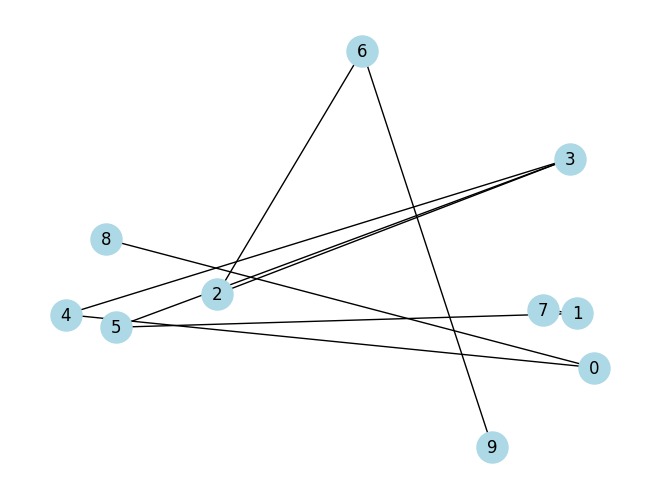

In [59]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [60]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 4), (0, 8), (1, 5), (1, 7), (2, 3), (2, 6), (3, 4), (3, 5), (6, 9)]),
 9)

## Prim's algorithm

In [61]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

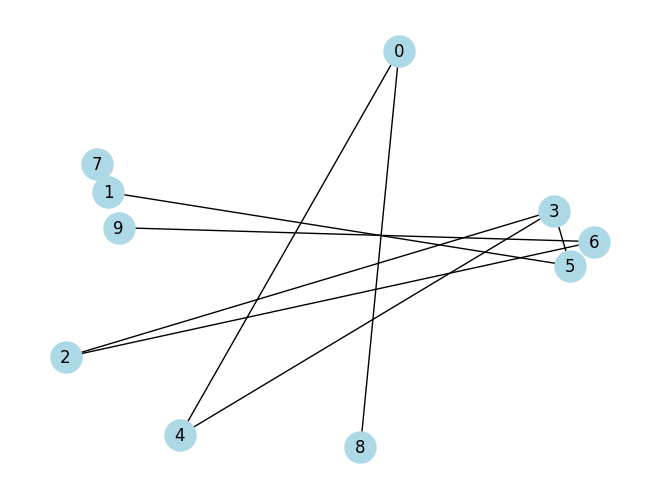

In [62]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [63]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 4), (0, 8), (1, 5), (1, 7), (2, 3), (2, 6), (3, 4), (3, 5), (6, 9)]),
 9)

# For Task 2

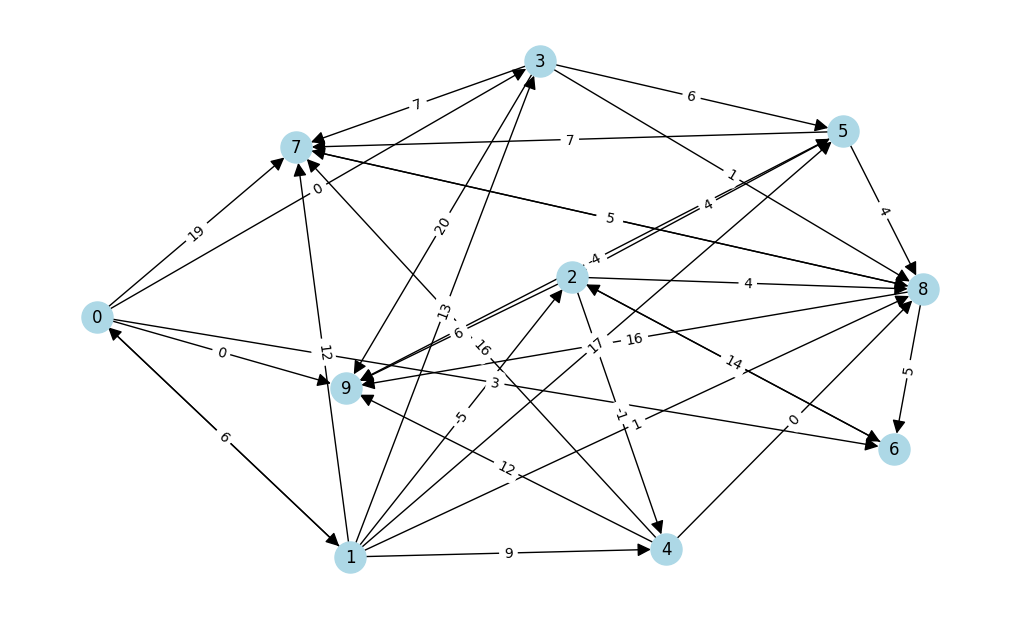

In [64]:
G = gnp_random_connected_graph(10, 0.5, True, True)

## Bellman-Ford algorithm

In [65]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [66]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 1)
    s = sorted(dict(dist).keys())
    z = list({i: dict(dist)[i] for i in s}.values())
except:
    print("Negative cycle detected")


In [67]:
def bellman_ford(G, nod):
    chosen_nod = list(G.nodes)[nod]
    distances = [float('inf')] * G.number_of_nodes()
    distances[chosen_nod] = 0
    for _ in range(G.number_of_nodes() - 1):
        for i, k ,w in G.edges(data=True):
            if distances[i] != float('inf') and distances[i] + w['weight'] < distances[k]:
                distances[k] = distances[i] + w['weight']
    for i, k, w in G.edges(data=True):
        if distances[i] != float('inf') and distances[i] + w['weight'] < distances[k]:
            return "Negative cycle detected"
    return distances


## Floyd-Warshall algorithm

In [68]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [69]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
def f():
    x = []
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        s = sorted(dict(v).keys())
        x.append(list({i: dict(v)[i] for i in s}.values()))
    for j in range(len(x)):
        if x[j][j] == 0:
            return "Negative cycle detected"
    return x


In [70]:
def floyd_warshall(G):
    n = G.number_of_nodes()
    diction = {(x[0], x[1]):x[2]['weight'] for x in G.edges(data=True)}
    matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i, line in enumerate(matrix):
        for k in range(len(line)):
            if i == k:
                matrix[i][k] = 0
            elif (i, k) in G.edges():
                matrix[i][k] = diction[(i, k)]
            else:
                matrix[i][k] = float('inf')
    for a in range(n):
        for b in range(n):
            for c in range(n):
                if matrix[b][c] > matrix[b][a] + matrix[a][c]:
                    matrix[b][c] = matrix[b][a] + matrix[a][c]
    for j in range(n):
        if matrix[j][j] < 0:
            return "Negative cycle detected"
    return matrix


## Some useful explanations

### How to get list of edges for your algorithm

In [71]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [72]:
edges[:5]

[(0, 1), (0, 3), (0, 6), (0, 7), (0, 9)]

### To get edges with weights

In [73]:
edges = list(G.edges(data=True))

In [74]:
edges[:5]

[(0, 1, {'weight': 7}),
 (0, 3, {'weight': 0}),
 (0, 6, {'weight': 3}),
 (0, 7, {'weight': 19}),
 (0, 9, {'weight': 0})]

In [75]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Testing

### 1. Testing correctness
Firstly, we must test if:
1. our algorithms return a tree that contain all edges of the original graph
2. if this is tree but not forest
3. if weight of tree produced by implemented algorithm is less or equal to networkx implementation

In [76]:

def test(name):
    for n in range(1, 7):
        n = 2 ** n
        print(">>> Graph size:", n)
        for j in range(1, 5):
            G = gnp_random_connected_graph(n, 1 / j, True, False)
            if name == 'f':
                x = []
                _, dist = floyd_warshall_predecessor_and_distance(G) 
                for _, v in dist.items():
                    s = sorted(dict(v).keys())
                    x.append(list({i: dict(v)[i] for i in s}.values()))
                for j in range(len(x)):
                    if x[j][j] < 0:
                        x = "Negative cycle detected"
                        break
                assert floyd_warshall(G) == x
            if name == 'b':
                for k in range(n):
                    try:
                        _, dist = bellman_ford_predecessor_and_distance(G, k)
                        s = sorted(dict(dist).keys())
                        z = list({i: dict(dist)[i] for i in s}.values())
                    except:
                        z = "Negative cycle detected"
                    bell = bellman_ford(G, k)
                    if isinstance(bell, list) and float('inf') in bell :
                        bell = [x for x in bell if x != float('inf')]
                    assert bell == z


In [77]:
print("Test Bellman-Ford implementation")
test('b')
print("Test Floyd-Warshall implementation")
test('f')

Test Bellman-Ford implementation
>>> Graph size: 2
>>> Graph size: 4
>>> Graph size: 8
>>> Graph size: 16
>>> Graph size: 32


>>> Graph size: 64
Test Floyd-Warshall implementation
>>> Graph size: 2
>>> Graph size: 4
>>> Graph size: 8
>>> Graph size: 16
>>> Graph size: 32
>>> Graph size: 64


### Time tests

In [78]:
import time
def plot_time_size(algorithms: dict[str, callable], max_nodes: int, completeness: float, step: str):

    algorithms_performance = {algorithm: [] for algorithm in algorithms}

    x = list(range(1, max_nodes+step, step))

    for i in x:
        g = gnp_random_connected_graph(i, completeness, True, False)

        for algorithm, algorithm_function in algorithms.items():
            if algorithm_function in [bellman_ford, bellman_ford_predecessor_and_distance]:
                start = time.perf_counter()
                try:
                    algorithm_function(g, 0)
                except:
                    pass
                end = time.perf_counter()
            else:
                start = time.perf_counter()
                try:
                    algorithm_function(g)
                except:
                    pass
                end = time.perf_counter()
            algorithms_performance[algorithm].append(end-start)

    for algorithm, performance in algorithms_performance.items():
        plt.plot(x, performance, label=algorithm)
    plt.legend()

    plt.show()


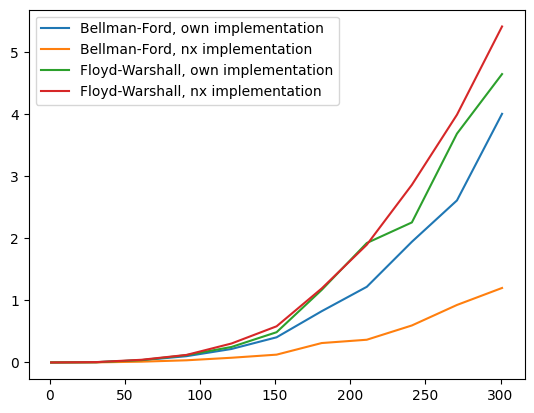

In [79]:
algorithms = {
    'Bellman-Ford, own implementation': bellman_ford,
    "Bellman-Ford, nx implementation": bellman_ford_predecessor_and_distance,
    "Floyd-Warshall, own implementation": floyd_warshall,
    "Floyd-Warshall, nx implementation": floyd_warshall_predecessor_and_distance
}

plot_time_size(algorithms, 300, 0.5, 30)